In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# no need invoke plt.show()
%matplotlib inline

# auto load external changed files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import matplotlib

# many rc params, eg. 'image.cmap': 'viridis'
# matplotlib.rc_params()

/Users/shuai/anaconda3/envs/play/lib/python3.7/site-packages/IPython/lib/pretty.py:697: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  output = repr(obj)


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [7]:
%whos

Variable        Type        Data/Info
-------------------------------------
cv2             module      <module 'cv2.cv2' from '/<...>2.cpython-37m-darwin.so'>
json            module      <module 'json' from '/Use<...>hon3.7/json/__init__.py'>
matplotlib      module      <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np              module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt             module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
yapf_reformat   function    <function yapf_reformat at 0x1247964d0>


### rgb -> gray -> binary

In [15]:
# rgb -> gray -> binary
img = cv2.imread('imgs/j20.jpeg')  # (413, 600, 3)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # (413, 600)
imgray.shape

(413, 600)

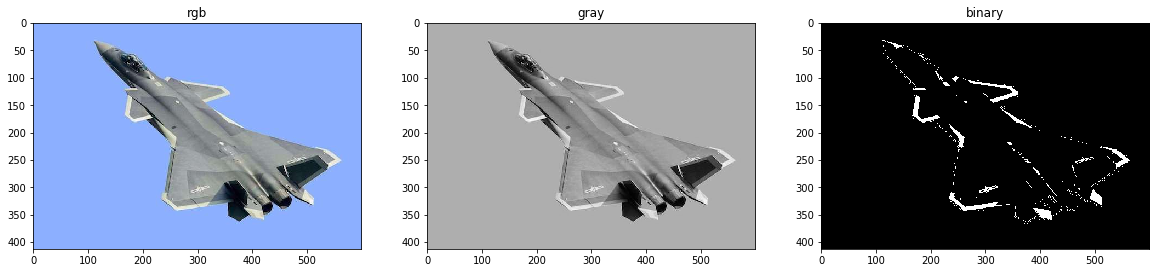

In [16]:
# thresh val 对生成的边缘 影响很大
ret, binary = cv2.threshold(src=imgray, thresh=180, maxval=255, type=cv2.THRESH_BINARY)

# plt
fig = plt.figure(figsize=(20, 5))

# rgb
ax1 = fig.add_subplot(131)
plt.imshow(img[:, :, ::-1])
plt.title('rgb')

# cmap: scalar to colors, Defaults to :rc:`image.cmap`.

# gray
ax2 = fig.add_subplot(132)
plt.imshow(imgray, cmap='gray') # plt 默认会将灰度图用
# plt.colorbar()  # 对应 cmap
plt.title('gray')

# binary
ax3 = fig.add_subplot(133)
plt.imshow(binary, cmap='gray')
plt.title('binary')

plt.show()

### 图像轮廓

In [45]:
# Finds contours in a binary image. 寻找轮廓，黑色背景中寻找白色边界
# 1: image, 输入图像，二值化 或者 Canny 边界检测结果
# 2: mode, 轮廓检索模式，retrieve
# 3: method, 轮廓近似方法，approximate
# return
# 1: image, 即为传入的 binary image
# 2: contours, list, 储存图像所有轮廓，每个轮廓都是np数组
# 3: hierarchy, np，轮廓层次结构
_, contours, hierarchy = cv2.findContours(image=binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
print(type(contours), len(contours))
print(type(contours[0]), contours[0].shape)
print(type(hierarchy), hierarchy.shape)

<class 'list'> 371
<class 'numpy.ndarray'> (1, 1, 2)
<class 'numpy.ndarray'> (1, 371, 4)


In [62]:
# 选出层级检测轮廓点数 > 50
cont_idx = []
for i in range(len(contours)):
    if contours[i].shape[0] > 50:
        cont_idx.append(i)
        print(i, contours[i].shape)
print('total_num:', len(cont_idx))

43 (56, 1, 2)
122 (99, 1, 2)
133 (51, 1, 2)
189 (52, 1, 2)
214 (88, 1, 2)
253 (58, 1, 2)
276 (80, 1, 2)
283 (86, 1, 2)
300 (118, 1, 2)
total_num: 9


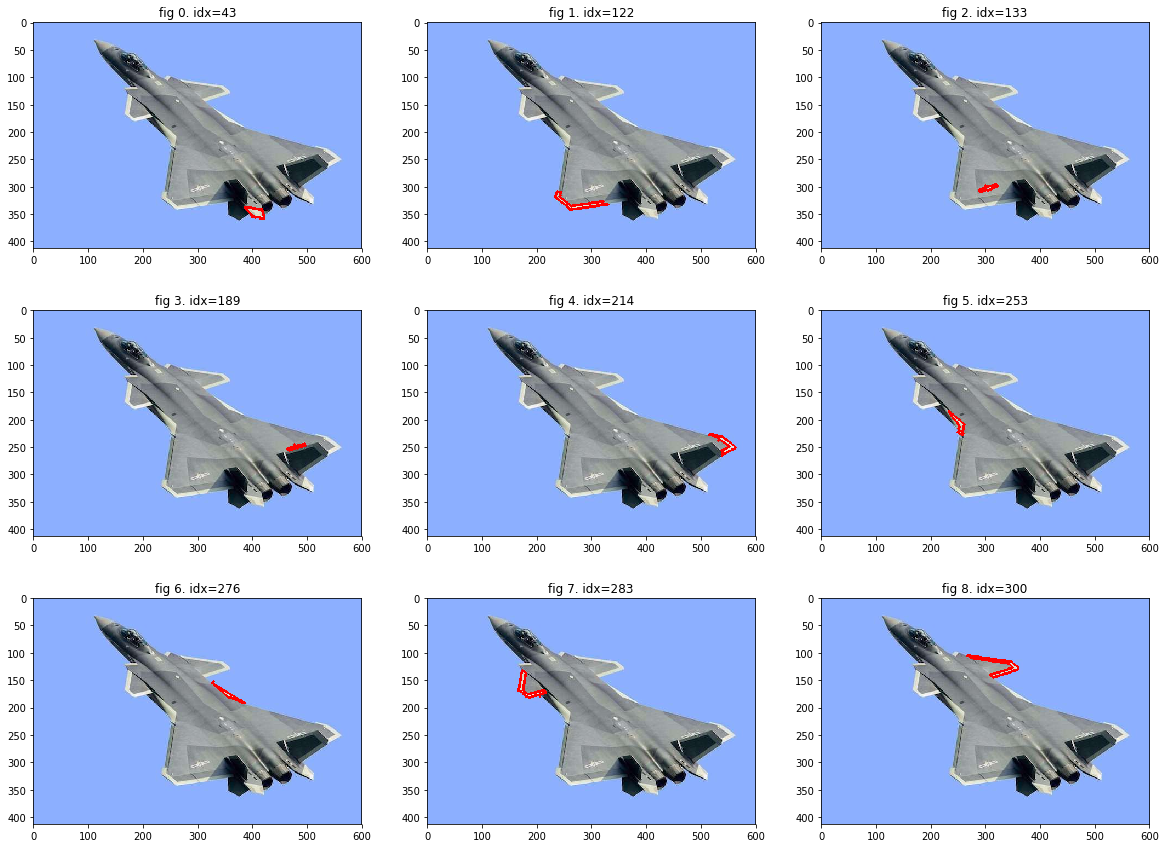

In [68]:
fig = plt.figure(figsize=(20, 15))

for i in range(len(cont_idx)):  # copy() 因为 drawContours 会改变传入的 img
    img_cont = cv2.drawContours(img.copy(), contours, contourIdx=cont_idx[i], color=(0,0,255), thickness=3)
    ax = fig.add_subplot(3, 3, i + 1)
    plt.imshow(img_cont[:,:,::-1])
    plt.title('fig {}. idx={}'.format(i, cont_idx[i]))

plt.show()

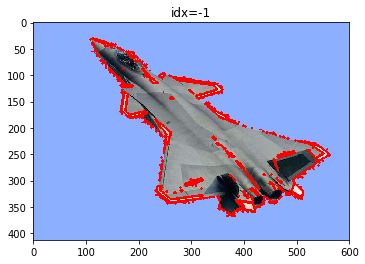

In [69]:
img_cont = cv2.drawContours(img.copy(), contours, contourIdx=-1, color=(0,0,255), thickness=3)
plt.imshow(img_cont[:,:,::-1])
plt.title('idx=-1')
plt.show()

### 图像的矩

{'m00': 5538.5,
 'm01': 580395.6666666666,
 'm02': 68863806.58333333,
 'm03': 9040576552.4,
 'm10': 1059024.8333333333,
 'm11': 118652081.79166666,
 'm12': 14916163733.033333,
 'm20': 211027454.41666666,
 'm21': 25174017347.13333,
 'm30': 43711144506.850006,
 'mu02': 8042441.6134959385,
 'mu03': 138554081.52818108,
 'mu11': 7673762.001280189,
 'mu12': 140300644.69494295,
 'mu20': 8529738.858899355,
 'mu21': 125208258.02586877,
 'mu30': 98302529.92241669,
 'nu02': 0.262182437399648,
 'nu03': 0.06069304455767405,
 'nu11': 0.2501635351811879,
 'nu12': 0.06145811935687085,
 'nu20': 0.2780682573630293,
 'nu21': 0.05484696155852439,
 'nu30': 0.043061018216917823}


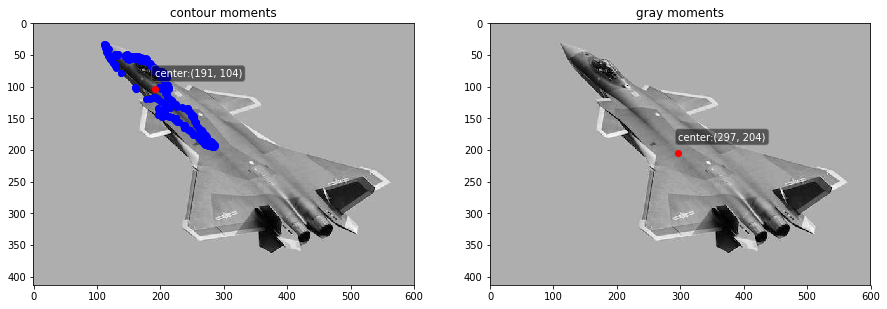

In [2]:
from pprint import pprint

img = cv2.imread('j20.jpeg', 0)

fig = plt.figure(figsize=(15, 5))

# 1.contour 求图像矩
ret, thresh = cv2.threshold(img, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, 1, 2)

# find contour having max_num pts
max_pts = contours[0].shape[0]
max_idx = 0
for i in range(len(contours)):
    if contours[i].shape[0] > max_pts:
        max_pts = contours[i].shape[0]
        max_idx = i

M = cv2.moments(contours[max_idx]) # 2值图像
pprint(M) # a dict has many moments

# 图像重心
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

ax = fig.add_subplot(121)
plt.imshow(img, cmap='gray')

# plot contour
for pt in contours[max_idx]:
    plt.plot(pt[0][0], pt[0][1], marker='o', color='b')

# plt center
plt.plot(cx, cy, marker='o', color='r')
plt.text(
    cx, cy-20, 
    s='center:({}, {})'.format(cx, cy), color='w',
    bbox=dict(boxstyle="round", fc="black", ec="0.5", alpha=0.5)
)
plt.title('contour moments')

# 2.grayimg 求图像矩
M = cv2.moments(img)  # 灰度图像 
# pprint(M)  

# 图像重心
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

ax = fig.add_subplot(122)
plt.imshow(img, cmap='gray')
plt.plot(cx, cy, marker='o', color='r')
plt.text(
    cx, cy-20, 
    s='center:({}, {})'.format(cx, cy), color='w',
    bbox=dict(boxstyle="round", fc="black", ec="0.5", alpha=0.5)
)
plt.title('gray moments')

plt.show()

### contour 面积，周长，凸包

In [3]:
contour = contours[max_idx]
print(contour.shape)  # 386 pts

(386, 1, 2)


In [4]:
area = cv2.contourArea(contour)  # 轮廓面积
print('area:', area)

M = cv2.moments(contour) 
print("M['m00']:", M['m00'])  # 0阶矩就是统计区域内点的数量

area: 5538.5
M['m00']: 5538.5


In [5]:
perimeter = cv2.arcLength(contour, True)  # 轮廓周长
print('perimeter:', perimeter)

perimeter: 790.7909718751907


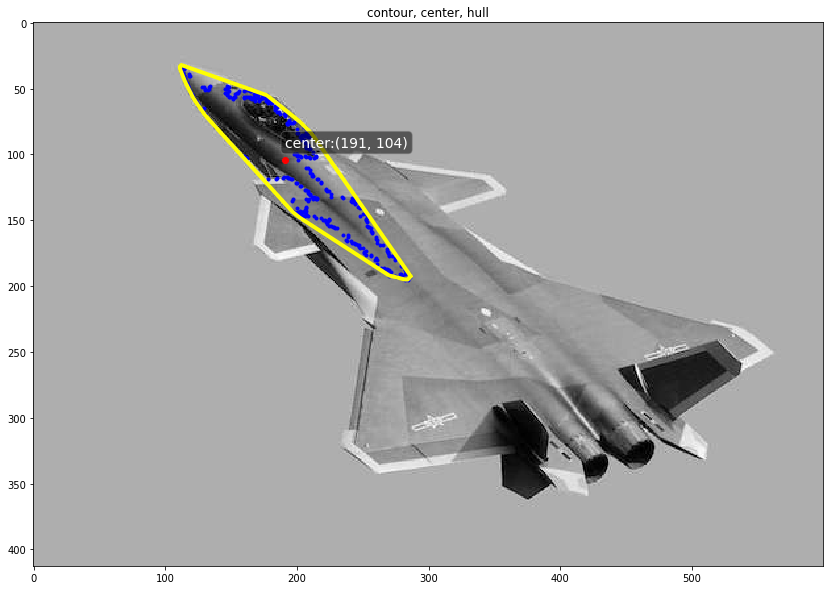

In [7]:
# 凸包
hull = cv2.convexHull(contour)
# print(hull.shape)  # (19, 1, 2)

# 图像重心
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

plt.figure(figsize=(20, 10))
plt.imshow(img, cmap='gray')

# plot contour
for pt in contour:
    plt.plot(pt[0][0], pt[0][1], marker='.', color='b')

# plt center
plt.plot(cx, cy, marker='o', color='r')
plt.text(
    cx, cy-10, 
    s='center:({}, {})'.format(cx, cy), color='w', fontsize=14,
    bbox=dict(boxstyle="round", fc="black", ec="0.5", alpha=0.5)
)

# plt hull
plt.plot(hull[:,:,0], hull[:,:,1], color='yellow', linestyle='-', linewidth=4)

plt.title('contour, center, hull')

plt.show()

### 椭圆拟合

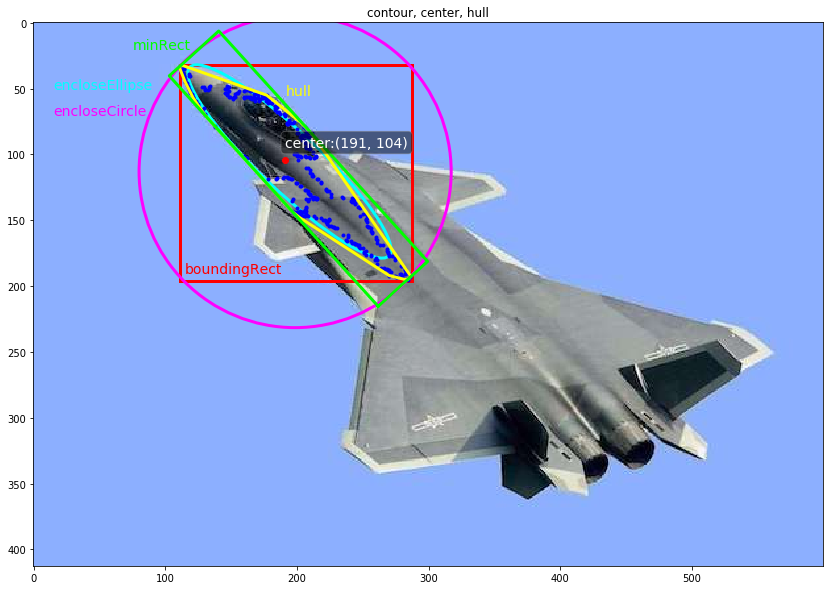

In [35]:
import matplotlib.patches as patches

# 凸包
hull = cv2.convexHull(contour)
# print(hull.shape)  # (19, 1, 2)

# 图像重心
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

plt.figure(figsize=(20, 10))
plt.title('contour, center, hull')

color_img = cv2.imread('j20.jpeg')  # color img
plt.imshow(color_img[:,:,::-1])

# plot contour
for pt in contour:
    plt.plot(pt[0][0], pt[0][1], marker='.', color='b')

# plt center
plt.plot(cx, cy, marker='o', color='r')
plt.text(cx, cy-10,
         s='center:({}, {})'.format(cx, cy), color='w', fontsize=14,
         bbox=dict(boxstyle="round", fc="black", ec="0.5", alpha=0.5))

# plt hull
plt.plot(hull[:,:,0], hull[:,:,1], color='yellow', linestyle='-', linewidth=3)
plt.text(191, 55, s='hull', color='yellow', fontsize=14)

# contour bounding rect
x, y, w, h = cv2.boundingRect(contour) # 111 32 176 164
plt.gca().add_patch(patches.Rectangle((x, y), w, h,
                                      linewidth=3, edgecolor='r', facecolor='none'))
plt.text(115, 190, s='boundingRect', color='r', fontsize=14)

# contour min enclosed rect
rect = cv2.minAreaRect(contour) # 2维点集
box = cv2.boxPoints(rect) # (4,2) 4个点
xs = np.append(box[:,0], box[:,0][0]) # 封闭矩形
ys = np.append(box[:,1], box[:,1][0])
plt.plot(xs, ys, color=(0,1.0,0), linestyle='-', linewidth=3)
plt.text(75, 20, s='minRect', color=(0,1.0,0), fontsize=14)

# contour enclosed circle
(x, y), radius = cv2.minEnclosingCircle(contour)
plt.gca().add_patch(patches.Circle((x, y), radius, 
                                   linewidth=3, edgecolor=(1.0,0,1.0), facecolor='none'))
plt.text(15, 70, s='encloseCircle', color=(1.0,0,1.0), fontsize=14)

# contour enclosed ellipse
(x, y), (b, a), angle= cv2.fitEllipse(contour)  # a 长轴，b 短轴
plt.gca().add_patch(patches.Ellipse((x, y), width=b, height=a, angle=angle, 
                                   linewidth=3, edgecolor=(0,1.0,1.0), facecolor='none'))
plt.text(15, 50, s='encloseEllipse', color=(0,1.0,1.0), fontsize=14)

plt.show()

In [30]:
ellipse = cv2.fitEllipse(contour)
print(ellipse)

((194.17245483398438, 105.28562927246094), (44.48927688598633, 208.38265991210938), 133.4476776123047)
